In [2]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import random 
import sys
np.set_printoptions(threshold=sys.maxsize)

In [3]:
N = 100
dt = 1 
dx = 1
D_u = 0.16
D_v = 0.08
f = 0.035
k = 0.060
w = 1.9

In [22]:
def init(N, v_size):
    '''
    Initialize a grid with all zeros
    Args:
        -N the size of the grid
    Out: the initial state 
    of the grid
    '''
    u_grid =  np.full((N,N), 0.5)
    v_grid = np.zeros((N,N))
    for i in np.arange(int(N/2-v_size),int(N/2+v_size),1):
        for j in np.arange(int(N/2-v_size),int(N/2+v_size),1):
            v_grid[i,j]=0.25
    return u_grid, v_grid

In [23]:
def GS_update(U_grid, D_u, V_grid, D_v, f, k):
    U = np.copy(U_grid)
    V = np.copy(V_grid)
    for j in range(1,len(U)-1):
        for i in range(1,len(U)-1):
            u = U[j,i]
            v = V[j,i]
            # Deze boundary conditions moeten we aanpassen. Zodat het veld niet leeg loopt. 
            if i == 0:
                grad_u = U[j,i] + ( D_u*dt / (dx**2)) * (U[j+1,i] + U[j-1,i]+ U[j,i+1] +U[j,-1] -4 * U[j,i]) 
                grad_v = V[j,i] + ( D_v*dt / (dx**2)) * (V[j+1,i] + V[j-1,i]+ V[j,i+1] +V[j,-1] -4 * V[j,i]) 
            elif i == len(U_grid)-1:
                grad_u = U[j,i] + ( D_u*dt / (dx**2)) * (U[j+1,i] + U[j-1,i]+ U[j,len(U_grid)-1] +U[j,i-1] -4 * U[j,i])
                grad_v = V[j,i] + ( D_v*dt / (dx**2)) * (V[j+1,i] + V[j-1,i]+ V[j,len(U_grid)-1] +V[j,i-1] -4 * V[j,i])
            else:
                grad_u = U[j,i] + ( D_u*dt / (dx**2)) * (U[j+1,i] + U[j-1,i]+ U[j,i+1] +U[j,i-1] -4 * U[j,i])
                grad_v = V[j,i] + ( D_v*dt / (dx**2)) * (V[j+1,i] + V[j-1,i]+ V[j,i+1] +V[j,i-1] -4 * V[j,i])
            U_grid[j,i] = D_u * grad_u - u * v**2 + f * (1-u)
            V_grid[j,i] = D_v * grad_v + u * v**2 - (f+k) * v
    return U_grid, V_grid
    


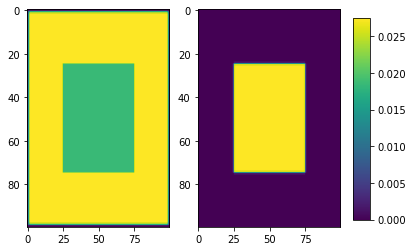

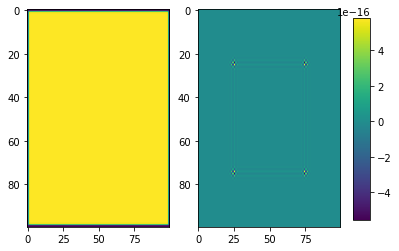

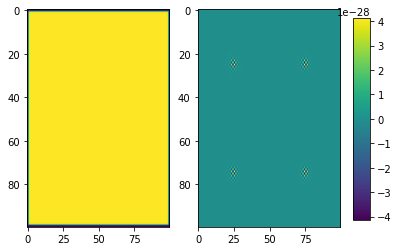

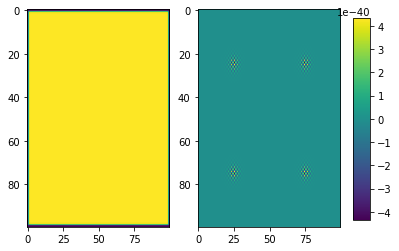

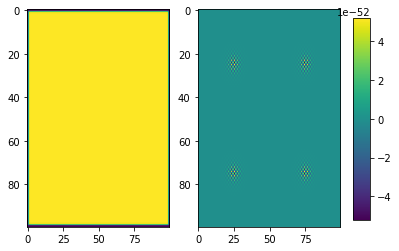

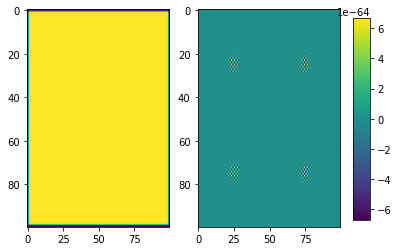

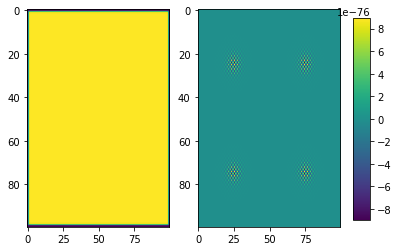

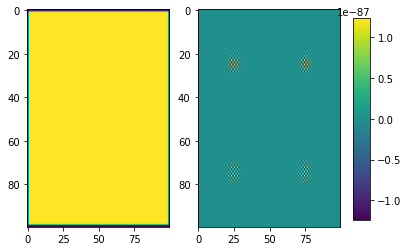

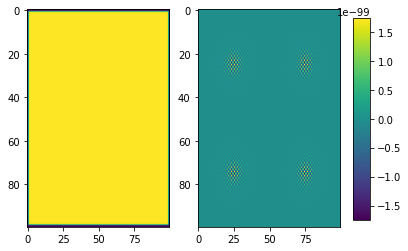

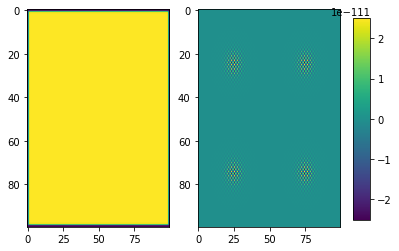

In [21]:
U_grid,V_grid = init(N,25)

def run(U_grid,V_grid,t_max):
    for t in range(t_max):
        U_grid, V_grid = GS_update(U_grid, D_u, V_grid, D_v, f, k)
        if t%10==0:
            fig, axes = plt.subplots(nrows=1, ncols=2)
            im1 = axes[0].imshow(U_grid,
#                                  vmin=0, vmax=0.5, 
                                 aspect='auto', cmap='viridis')
            im2 = axes[1].imshow(V_grid,
#                                  vmin=0, vmax=0.5,
                                 aspect='auto', cmap='viridis')

            fig.subplots_adjust(right=0.85)
            cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
            fig.colorbar(im2, cax=cbar_ax)
run(U_grid,V_grid,100)